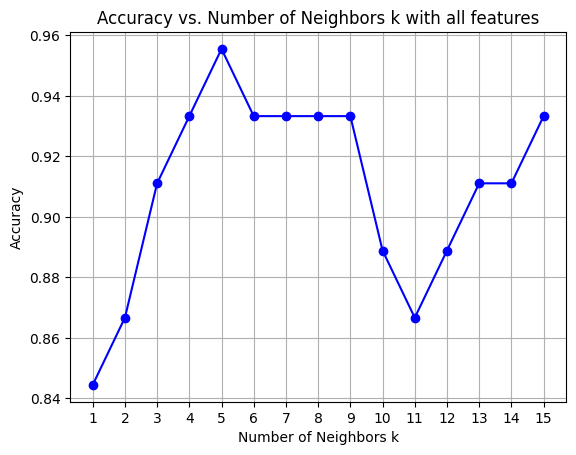

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# Učitavanje i priprema podataka
df = pd.read_csv('iris.csv').dropna()

x = df.drop(['species'], axis=1)
y = df['species']

# Kodiranje ciljne promenljive
y = LabelEncoder().fit_transform(y)

# Standardizacija feature-a
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Podela podataka na trening i test skupove
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Definicija klase KNN
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X_train, x)), axis=1))
            _, indices = tf.nn.top_k(-distances, self.k)
            k_nearest_labels = tf.gather(self.y_train, indices)
            y_pred.append(np.argmax(np.bincount(k_nearest_labels)))
        return np.array(y_pred)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Testiranje različitih vrednosti za k
acc_arr = []
for k in range(1, 16):
    knn = KNN(k)
    knn.fit(x_train, y_train)
    acc = knn.accuracy(x_test, y_test)
    acc_arr.append(acc)

# Vizualizacija zavisnosti tačnosti od k
k_values = np.arange(1, 16)
plt.plot(k_values, acc_arr, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors k with all features')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Komentar:
Upoređujući ova dva grafika, može se primetiti da uključivanje svih karakteristika u model
generalno poboljšava tačnost klasifikacije preko celog raspona vrednosti k.
Dok je kod korišćenja samo dva feature-a bilo optimalno koristiti manji broj k suseda,
uključivanje svih karakteristika omogućava modelu da efikasnije klasifikuje uzorke čak i
sa većim brojem k suseda. Ovo sugeriše da dodatne informacije koje pružaju dodatni feature-i
pomažu modelu da napravi bolje granice odlučivanja među klasama.
Specifično, za ovaj dataset, može se zaključiti da kompletniji set feature-a
omogućava bolju generalizaciju, što dovodi do više tačnosti kod većih vrednosti k.